## Summary
This project performs clustering analysis using a few factors, then use the clustersfor "classification neutral" stock selction. We will compare this neutrality strategy to a more traditional sector neutral strategy.

### 1. Import package & variables setup

In [286]:
import pandas as pd
import numpy as np
from os import path
import os

# import KMeans
from sklearn.cluster import KMeans

# data viz packages
import matplotlib.pyplot as plt
import plotly.graph_objects as plty
from plotly.subplots import make_subplots

In [116]:
clr1 = ["#00ab4e","#58595b","#939598","#000000","#FFFFFF"]
clr2 = ["#009697","#8dc63f","#f7941d","#ee2f53","#00b5f1","#96157c","#00ab4e","#58595b"]

sc_path = r'C:\Users\patrick.fang\OneDrive - IHS Markit\ResearchSignals\Projects\20200213_StockClustering'
file1 = 'Factor_data_USLC_2019.txt'
file2 = 'Factor_data_USTC_2019.txt'


### 2. Load data

In [3]:
sc_data = pd.read_csv(path.join(sc_path,file1), sep='\t')
sc_data.head()

Date  FactorId SecurityId  Rank  RawRatio
0  2019-01-31 00:00:00        29   02376R10  9255  -0.01026
1  2019-01-31 00:00:00        29   02393410  2107   1.07825
2  2019-01-31 00:00:00        29   03042010  6289   0.33917
3  2019-01-31 00:00:00        29   03673L10  6409   0.32404
4  2019-01-31 00:00:00        29   04247X10  8366   0.09735

Factor & ID mapping

|Factor|Factor ID|Factor Name|
|------|---------|-----------|
|ROIC|249|Return on Invested Capital|
|FCFROI|146|Free Cash Flow Return on Invested Capital|
|EBITDAP|106|TTM EV/EBITDA|
|TTMSP|304|TTM Price to Sale|
|ChgShare|73|Percent Change in Shares Outstanding|
|BP|29|Book-to-Market|


In [4]:
# test = sc_data.loc[(sc_data.Date == '2019-01-31 00:00:00') & (sc_data.FactorId == 29),]
# test.shape

sc_data.groupby(['Date','FactorId']).Rank.median()

Date                 FactorId
2019-01-31 00:00:00  29          6208.5
                     73          1456.0
                     106         3985.0
                     146         2638.0
                     249         2763.0
                                  ...  
2020-02-12 00:00:00  73          2387.0
                     106         4386.0
                     146         2596.5
                     249         2693.0
                     304         5391.5
Name: Rank, Length: 84, dtype: float64

In [149]:
# Creating crosssectional ranking columns

sc_data['cs_PRank'] = sc_data.groupby(['Date','FactorId']).Rank.rank(pct=True)

sc_data.sort_values(['Date','SecurityId']).head()
sc_data[(sc_data.SecurityId == 'HOLX') & (sc_data.Date == '2019-01-31 00:00:00')]

# double check the percentile ranck, look good
# sc_data.loc[(sc_data.Date == '2019-01-31 00:00:00') & 
#             (sc_data.FactorId == 29) & 
#             (sc_data.prank < 0.05),].sort_values(['prank'])



Date  FactorId SecurityId  Rank  RawRatio  cs_PRank
3305   2019-01-31 00:00:00        29       HOLX  7470   0.20173  0.696043
25150  2019-01-31 00:00:00        73       HOLX   790  -1.89100  0.283759
32902  2019-01-31 00:00:00       106       HOLX  6144   0.01760  0.920981
40179  2019-01-31 00:00:00       146       HOLX  1352   0.10820  0.271493
63655  2019-01-31 00:00:00       249       HOLX  6626  -0.05537  0.952839
90085  2019-01-31 00:00:00       304       HOLX  6229   0.27095  0.673561

In [6]:
test = sc_data[sc_data.FactorId == 29].RawRatio
test.shape

(15729,)

### 3. Examine data

In [480]:
### pivot table the data to have factors as columns and PRank as values
a = sc_data.pivot_table(index=[pd.to_datetime(sc_data.Date),'SecurityId'], columns='FactorId', values='cs_PRank', fill_value = 0)

type(a)
a.columns = ['BP','ChgShare','EBITDAP','FCFROI','ROIC','TTMSP']
a.head()

BP  ChgShare   EBITDAP    FCFROI      ROIC  \
Date       SecurityId                                                     
2019-01-31 00090Q10    0.153777  0.801095  0.040872  0.380995  0.742674   
           00163T10    0.334532  0.958942  0.711172  0.918552  0.687729   
           00164V10    0.881295  0.028285  0.013624  0.170136  0.195055   
           00287Y10    0.964928  0.094891  0.542234  0.095928  0.077839   
           00766T10    0.127698  0.443431  0.349682  0.353846  0.808608   

                          TTMSP  
Date       SecurityId            
2019-01-31 00090Q10    0.253597  
           00163T10    0.941547  
           00164V10    0.263489  
           00287Y10    0.680755  
           00766T10    0.018885

SyntaxError: can't assign to function call (<ipython-input-478-add386a5ef9f>, line 1)

In [482]:
b = a.loc['2019-01-31']
b.index.names
b.index

MultiIndex([('2019-01-31', '00090Q10'),
            ('2019-01-31', '00163T10'),
            ('2019-01-31', '00164V10'),
            ('2019-01-31', '00287Y10'),
            ('2019-01-31', '00766T10'),
            ('2019-01-31', '00847X10'),
            ('2019-01-31', '00912X30'),
            ('2019-01-31', '01527110'),
            ('2019-01-31', '01858110'),
            ('2019-01-31', '01973R10'),
            ...
            ('2019-01-31',      'YRI'),
            ('2019-01-31',      'YUM'),
            ('2019-01-31',   'YUMCWI'),
            ('2019-01-31',        'Z'),
            ('2019-01-31',      'ZAP'),
            ('2019-01-31',     'ZAYO'),
            ('2019-01-31',     'ZBRA'),
            ('2019-01-31',    'ZCVVV'),
            ('2019-01-31',     'ZION'),
            ('2019-01-31',     'ZMRH')],
           names=['Date', 'SecurityId'], length=1112)

In [188]:
# scatter plot two factors, check both raw ratio & PRank
# fig1 = plty.Figure()
# fig1.add_trace(plty.Scatter(x=b.EBITDAP.values, 
#                             y=b.ROIC.values, 
#                             mode='markers',
#                             text=b.index,
#                             marker_color=clr1[0]))
# fig1.update_layout(
#     title = 'Scatterplot of EBITDAP vs. ROIC',
#     yaxis_title = 'ROIC Percentile',
#     xaxis_title = 'TTM EV/EBITDA Percentile'
# )
# fig1.show()

b.columns

Index(['BP', 'ChgShare', 'EBITDAP', 'FCFROI', 'ROIC', 'TTMSP'], dtype='object')

In [483]:
plt.scatter(b.EBITDAP.values, b.FCFROI.values, s=20, c=clr1[0])

### 4. K-Means Clustering


In [484]:
### test indexing data under multiindex framework

# a.index.names

#a[[29,73]]

a.loc[['2019-01-31'],('EBITDAP','FCFROI')]


EBITDAP    FCFROI
Date       SecurityId                    
2019-01-31 00090Q10    0.040872  0.380995
           00163T10    0.711172  0.918552
           00164V10    0.013624  0.170136
           00287Y10    0.542234  0.095928
           00766T10    0.349682  0.353846
...                         ...       ...
           ZAYO        0.195277  0.663348
           ZBRA        0.623978  0.083258
           ZCVVV       0.960945  0.596833
           ZION        0.256131  0.370136
           ZMRH        0.628520  0.508597

[1112 rows x 2 columns]

In [485]:
# create data sample in array using 1/31/2019
dsamp = a.loc['2019-01-31',('EBITDAP','FCFROI')].values

# create kmeans object
kmeans = KMeans(n_clusters=8)
# fit kmeans object to data
kmeans.fit(dsamp)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(dsamp)

[[0.8437384  0.12959105]
 [0.71738858 0.47544391]
 [0.15989065 0.21290265]
 [0.11793667 0.82609455]
 [0.85724563 0.83995515]
 [0.51876552 0.20771446]
 [0.2558371  0.52182242]
 [0.473363   0.79429018]]


In [486]:
# Scatter plot the clusters

plt.scatter(dsamp[y_km ==0,0], dsamp[y_km == 0,1], s=20, c=clr2[0])
plt.scatter(dsamp[y_km ==1,0], dsamp[y_km == 1,1], s=20, c=clr2[1])
plt.scatter(dsamp[y_km ==2,0], dsamp[y_km == 2,1], s=20, c=clr2[2])
plt.scatter(dsamp[y_km ==3,0], dsamp[y_km == 3,1], s=20, c=clr2[3])
plt.scatter(dsamp[y_km ==4,0], dsamp[y_km == 4,1], s=20, c=clr2[4])
plt.scatter(dsamp[y_km ==5,0], dsamp[y_km == 5,1], s=20, c=clr2[5])
plt.scatter(dsamp[y_km ==6,0], dsamp[y_km == 6,1], s=20, c=clr2[6])
plt.scatter(dsamp[y_km ==7,0], dsamp[y_km == 7,1], s=20, c=clr2[7])

In [327]:
# fig2 = plty.Figure()
# fig2.add_trace(plty.Scatter(x=dsamp[y_km ==0,0], y=dsamp[y_km == 0,1], mode='markers',marker_color=clr2[0]))
# fig2.add_trace(plty.Scatter(x=dsamp[y_km ==1,0], y=dsamp[y_km == 1,1], mode='markers',marker_color=clr2[1]))
# fig2.add_trace(plty.Scatter(x=dsamp[y_km ==2,0], y=dsamp[y_km == 2,1], mode='markers',marker_color=clr2[2]))
# fig2.add_trace(plty.Scatter(x=dsamp[y_km ==3,0], y=dsamp[y_km == 3,1], mode='markers',marker_color=clr2[3]))
# fig2.add_trace(plty.Scatter(x=dsamp[y_km ==4,0], y=dsamp[y_km == 4,1], mode='markers',marker_color=clr2[4]))
# fig2.add_trace(plty.Scatter(x=dsamp[y_km ==5,0], y=dsamp[y_km == 5,1], mode='markers',marker_color=clr2[5]))
# fig2.add_trace(plty.Scatter(x=dsamp[y_km ==6,0], y=dsamp[y_km == 6,1], mode='markers',marker_color=clr2[6]))
# fig2.add_trace(plty.Scatter(x=dsamp[y_km ==7,0], y=dsamp[y_km == 7,1], mode='markers',marker_color=clr2[7]))
# fig2.update_layout(
#     title = 'Cluster Plot of EBITDAP vs. FCFROI',
#     yaxis_title = 'FCFROI Percentile',
#     xaxis_title = 'TTM EV/EBITDA Percentile'
# )
# fig2.show()

In [342]:
# create data sample in array using 1/31/2020
# cluster still looks similar, which indicates consistency of the pattern
dsamp2 = a.loc['2020-01-31',('EBITDAP','FCFROI')].values

# create kmeans object
kmeans2 = KMeans(n_clusters=8)
# fit kmeans object to data
kmeans2.fit(dsamp2)
# print location of clusters learned by kmeans object
print(kmeans2.cluster_centers_)
# save new clusters for chart
y_km2 = kmeans2.fit_predict(dsamp2)

[[0.79838783 0.13259193]
 [0.13616255 0.82218528]
 [0.74816853 0.50371925]
 [0.14590643 0.215625  ]
 [0.8978744  0.86220381]
 [0.48405978 0.24011174]
 [0.48170455 0.80075671]
 [0.20944514 0.5309447 ]]


In [343]:
# sc_data.Date.unique()

In [344]:
# Scatter plot the clusters

plt.scatter(dsamp2[y_km2 ==0,0], dsamp2[y_km2 == 0,1], s=20, c=clr2[0])
plt.scatter(dsamp2[y_km2 ==1,0], dsamp2[y_km2 == 1,1], s=20, c=clr2[1])
plt.scatter(dsamp2[y_km2 ==2,0], dsamp2[y_km2 == 2,1], s=20, c=clr2[2])
plt.scatter(dsamp2[y_km2 ==3,0], dsamp2[y_km2 == 3,1], s=20, c=clr2[3])
plt.scatter(dsamp2[y_km2 ==4,0], dsamp2[y_km2 == 4,1], s=20, c=clr2[4])
plt.scatter(dsamp2[y_km2 ==5,0], dsamp2[y_km2 == 5,1], s=20, c=clr2[5])
plt.scatter(dsamp2[y_km2 ==6,0], dsamp2[y_km2 == 6,1], s=20, c=clr2[6])
plt.scatter(dsamp2[y_km2 ==7,0], dsamp2[y_km2 == 7,1], s=20, c=clr2[7])

In [487]:
### check on some individual names to see whether there is any movements
# amzn, msft, ge, aapl, tsla
aapl = a.loc[a.index.get_level_values(1)=='AAPL',]
a.loc[a.index.get_level_values(1)=='AMZN',]
a.loc[a.index.get_level_values(1)=='GE',]
a.loc[a.index.get_level_values(1)=='CMB',] #JPM
a.loc[a.index.get_level_values(1)=='88160R10',] #TSLA
a.loc[a.index.get_level_values(1)=='G0624210',] #TEAM
a.loc[a.index.get_level_values(1)=='38259P70','BP'] #GOOG

seclist = ['AAPL','AMZN','GE','BA','CMB','88160R10','G0624210','38259P70']

a_sub = a[a.index.get_level_values(1).isin(seclist)]

In [488]:
# update security name to tickers
# a_sub.rename(index={'38259P70':'GOOG','G0624210':'TEAM','88160R10':'TSLA','CMB':'JPM'}, inplace=True)
a_sub

BP  ChgShare   EBITDAP    FCFROI      ROIC  \
Date       SecurityId                                                     
2019-01-31 38259P70    0.666367  0.582117  0.821072  0.189593  0.224817   
           88160R10    0.868705  0.835766  0.934605  0.941176  0.934066   
           AAPL        0.780576  0.069343  0.475931  0.079638  0.067766   
           AMZN        0.916367  0.794708  0.896912  0.146606  0.354396   
           BA          0.954137  0.126369  0.752952  0.003620  0.005495   
...                         ...       ...       ...       ...       ...   
2020-02-12 AMZN        0.895018  0.788256  0.832281  0.076029  0.276268   
           BA          0.973310  0.382562  0.914337  0.995528  0.876812   
           CMB         0.284698  0.151246  0.275023  0.953488  0.550725   
           G0624210    0.941281  0.853203  0.926961  0.038462  0.990942   
           GE          0.597865  0.644128  0.399459  0.768336  0.798007   

                          TTMSP  
Date       SecurityId            
2019-01-31 38259P70    0.823741  
           88160R10    0.590827  
           AAPL        0.606115  
           AMZN        0.686151  
           BA          0.451439  
...                         ...  
2020-02-12 AMZN        0.626335  
           BA          0.443950  
           CMB         0.546263  
           G0624210    0.983096  
           GE          0.200178  

[112 rows x 6 columns]

In [489]:
a_sub.loc[a_sub.index.get_level_values(1)=='BA',('EBITDAP','FCFROI')]

cmap = plt.get_cmap('viridis')
cmap(np.linspace(0, 1, len(names)))


array([[0.267004, 0.004874, 0.329415, 1.      ],
       [0.275191, 0.194905, 0.496005, 1.      ],
       [0.212395, 0.359683, 0.55171 , 1.      ],
       [0.153364, 0.497   , 0.557724, 1.      ],
       [0.122312, 0.633153, 0.530398, 1.      ],
       [0.288921, 0.758394, 0.428426, 1.      ],
       [0.626579, 0.854645, 0.223353, 1.      ],
       [0.993248, 0.906157, 0.143936, 1.      ]])

Here we plot some individual names and see where they fall. For EBITDAP vs. ROIC, Interesting to see GE, BA,TSLA & TEAM & at the same right top corner (expense & not profitable)...

Now switching to EBITDA vs. FCFROI, many interesting movements:
GE from top right to top left (expensive to cheap)
TSLA from top right to middle right (low FCFROI to moderate FCFROI)
AAPL horizontally move from left to right (great FCFROI but more expensive)
BA jump from botton left to top left (737Max impact of its profitability)


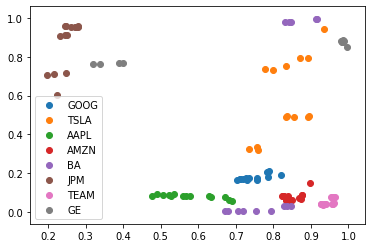

In [347]:

names = list(a_sub.index.get_level_values(1).unique())


for i, (name, color) in enumerate(zip(names, colors), 1):
    # print(a_sub.loc[a_sub.index.get_level_values(1)==name,'EBITDAP'].values)
    plt.scatter(a_sub.loc[a_sub.index.get_level_values(1)==name,'EBITDAP'].values,
                a_sub.loc[a_sub.index.get_level_values(1)==name,'FCFROI'].values, 
                label=name
                # ,c=clr2
               )
plt.legend()
plt.show()



### 5. Hierachical Clustering

In [112]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

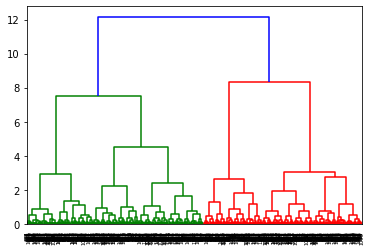

In [322]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(dsamp, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(dsamp)

### 6. Create Monthly Cluster Groupings & map it back to original dataset

In [396]:
# pd.DataFrame({'Cluster':y_km}, index = a.loc[['2019-01-31 00:00:00']].index)
a.shape[0]

15729

In [397]:
# create an empty np array to store the cuslter prediction
c_pred = np.empty(0)

for i,d in enumerate(a.index.get_level_values(0).unique()):
    datai =  a.loc[d,('EBITDAP','FCFROI')].values
    
    # create kmeans object
    kmeans = KMeans(n_clusters=8)
    # fit kmeans object to data
    kmeans.fit(datai)
    # print location of clusters learned by kmeans object
    # print(kmeans.cluster_centers_)
    # save new clusters for chart
    c_pred = np.append(c_pred,kmeans.fit_predict(datai))
    
    # print (datai)
    # print (i)

c_pred.shape
    

(15729,)

In [398]:


# # create data sample in array using 1/31/2019
# dsamp = a.loc['2019-01-31 00:00:00',('EBITDAP','FCFROI')].values

# # create kmeans object
# kmeans = KMeans(n_clusters=8)
# # fit kmeans object to data
# kmeans.fit(dsamp)
# # print location of clusters learned by kmeans object
# print(kmeans.cluster_centers_)
# # save new clusters for chart
# y_km = kmeans.fit_predict(dsamp)

In [490]:
# assign the cluster groupping back to the orginal table
c_pred_df = pd.DataFrame({'Cluster':c_pred}, index = a.index)
a['Cluster'] = c_pred_df['Cluster']
a.head()

BP  ChgShare   EBITDAP    FCFROI      ROIC  \
Date       SecurityId                                                     
2019-01-31 00090Q10    0.153777  0.801095  0.040872  0.380995  0.742674   
           00163T10    0.334532  0.958942  0.711172  0.918552  0.687729   
           00164V10    0.881295  0.028285  0.013624  0.170136  0.195055   
           00287Y10    0.964928  0.094891  0.542234  0.095928  0.077839   
           00766T10    0.127698  0.443431  0.349682  0.353846  0.808608   

                          TTMSP  Cluster  
Date       SecurityId                     
2019-01-31 00090Q10    0.253597      7.0  
           00163T10    0.941547      4.0  
           00164V10    0.263489      7.0  
           00287Y10    0.680755      3.0  
           00766T10    0.018885      0.0

### 7. Create Cluster Neutral Ranking

In [491]:
a['BP_CRank'] = a.groupby([a.index.get_level_values(0),'Cluster']).BP.rank(pct=True)
a.head()

BP  ChgShare   EBITDAP    FCFROI      ROIC  \
Date       SecurityId                                                     
2019-01-31 00090Q10    0.153777  0.801095  0.040872  0.380995  0.742674   
           00163T10    0.334532  0.958942  0.711172  0.918552  0.687729   
           00164V10    0.881295  0.028285  0.013624  0.170136  0.195055   
           00287Y10    0.964928  0.094891  0.542234  0.095928  0.077839   
           00766T10    0.127698  0.443431  0.349682  0.353846  0.808608   

                          TTMSP  Cluster  BP_CRank  
Date       SecurityId                               
2019-01-31 00090Q10    0.253597      7.0  0.148515  
           00163T10    0.941547      4.0  0.330357  
           00164V10    0.263489      7.0  0.950495  
           00287Y10    0.680755      3.0  0.916667  
           00766T10    0.018885      0.0  0.215569

(array([ 3.,  1., 10.,  8., 18., 25., 27., 30., 14., 12.]),
 array([0.03057554, 0.12607914, 0.22158273, 0.31708633, 0.41258993,
        0.50809353, 0.60359712, 0.69910072, 0.79460432, 0.89010791,
        0.98561151]),
 <a list of 10 Patch objects>)

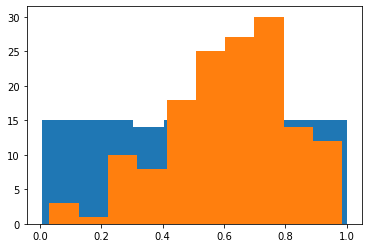

In [492]:
# some QA on the clustered rank
# looks good, the crank is unifrom for any cluster, while prank was not
test = a.loc[(a.index.get_level_values(0) == '2019-01-31 00:00:00') & (a.Cluster == 1),]['BP_CRank']
test1 = a.loc[(a.index.get_level_values(0) == '2019-01-31 00:00:00') & (a.Cluster == 1),]['BP']
plt.hist(test)
plt.hist(test1)

### 8. Getting security level return data and calc forward month return

In [413]:
# set sql connection
import pyodbc
server = 'RIC1D2RSGSQL01' 
database = 'EquityResearch' 
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;')
# cursor = conn.cursor()

In [433]:
# type(a.index.get_level_values(0).unique().format())

test = str(a.index.get_level_values(0).unique().format()).strip('[]')

f'IN ({test})'

"IN ('2019-01-31 00:00:00', '2019-02-28 00:00:00', '2019-03-29 00:00:00', '2019-04-30 00:00:00', '2019-05-31 00:00:00', '2019-06-28 00:00:00', '2019-07-31 00:00:00', '2019-08-30 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00', '2019-11-29 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00', '2020-02-12 00:00:00')"

In [434]:
DateList = str(a.index.get_level_values(0).unique().format()).strip('[]')

query = f'''SELECT SecurityId, TReturn, Date, Flag
--select count(1)
FROM EquityResearch.dbo.ReturnsHistory rh
	INNER JOIN securitydb.dbo.SecurityMaster_Hist sm
		ON rh.IntegerId = sm.IntegerId
		AND rh.Date BETWEEN sm.StartDate AND sm.EndDate
		-- AND LEFT(rh.IntegerId,1) = '1' --for US names
AND rh.Date IN ({DateList})
ORDER BY rh.Date
'''

query

"SELECT SecurityId, TReturn, Date, Flag\n--select count(1)\nFROM EquityResearch.dbo.ReturnsHistory rh\n\tINNER JOIN securitydb.dbo.SecurityMaster_Hist sm\n\t\tON rh.IntegerId = sm.IntegerId\n\t\tAND rh.Date BETWEEN sm.StartDate AND sm.EndDate\n\t\t-- AND LEFT(rh.IntegerId,1) = '1' --for US names\nAND rh.Date IN ('2019-01-31 00:00:00', '2019-02-28 00:00:00', '2019-03-29 00:00:00', '2019-04-30 00:00:00', '2019-05-31 00:00:00', '2019-06-28 00:00:00', '2019-07-31 00:00:00', '2019-08-30 00:00:00', '2019-09-30 00:00:00', '2019-10-31 00:00:00', '2019-11-29 00:00:00', '2019-12-31 00:00:00', '2020-01-31 00:00:00', '2020-02-12 00:00:00')\nORDER BY rh.Date\n"

In [435]:
ret = pd.read_sql_query(query,conn)
ret.shape

(251041, 4)

In [437]:
ret.head()

SecurityId       TReturn       Date  Flag
0       AINV  1.739588e+02 2019-01-31     0
1       APLL  1.750000e-01 2019-01-31     2
2       ISOG  5.000000e-04 2019-01-31     2
3       ADSX  1.848500e-11 2019-01-31     2
4       RGSH  1.363636e-04 2019-01-31     2

In [459]:
# join to unique security list to form a smaller subset
universe = pd.DataFrame({'SecurityId':a.index.get_level_values(1).unique().format()})
universe

uni_ret = pd.merge(ret, universe, how='inner', on=['SecurityId']).sort_values(['SecurityId','Date'])
uni_ret.reset_index(drop=True, inplace=True)

uni_ret['MRet'] = uni_ret.groupby(['SecurityId']).TReturn.pct_change().shift(periods=-1)*100
uni_ret

SecurityId     TReturn       Date  Flag       MRet
0       00090Q10   59.291279 2019-01-31     0  10.803338
1       00090Q10   65.696716 2019-02-28     0 -20.125003
2       00090Q10   52.475250 2019-03-29     0   3.683508
3       00090Q10   54.408180 2019-04-30     0 -11.229138
4       00090Q10   48.298611 2019-05-31     0   5.212693
...          ...         ...        ...   ...        ...
15014       ZMRH  494.035614 2019-09-30     0   0.699340
15015       ZMRH  497.490601 2019-10-31     0   5.100194
15016       ZMRH  522.863586 2019-11-29     0   3.193147
15017       ZMRH  539.559387 2019-12-31     0  -1.189212
15018       ZMRH  533.142883 2020-01-31     0        NaN

[15019 rows x 5 columns]

In [461]:
# uni_ret['Date'] = uni_ret['Date']+' 00:00:00'
# uni_ret.head()
ret_f = uni_ret.set_index(['Date','SecurityId'])
ret_f.head()

TReturn  Flag       MRet
Date       SecurityId                            
2019-01-31 00090Q10    59.291279     0  10.803338
2019-02-28 00090Q10    65.696716     0 -20.125003
2019-03-29 00090Q10    52.475250     0   3.683508
2019-04-30 00090Q10    54.408180     0 -11.229138
2019-05-31 00090Q10    48.298611     0   5.212693

In [494]:
a.index
# ret_f.index

MultiIndex([('2019-01-31', '00090Q10'),
            ('2019-01-31', '00163T10'),
            ('2019-01-31', '00164V10'),
            ('2019-01-31', '00287Y10'),
            ('2019-01-31', '00766T10'),
            ('2019-01-31', '00847X10'),
            ('2019-01-31', '00912X30'),
            ('2019-01-31', '01527110'),
            ('2019-01-31', '01858110'),
            ('2019-01-31', '01973R10'),
            ...
            ('2020-02-12',      'YRI'),
            ('2020-02-12',      'YUM'),
            ('2020-02-12',   'YUMCWI'),
            ('2020-02-12',        'Z'),
            ('2020-02-12',      'ZAP'),
            ('2020-02-12',     'ZAYO'),
            ('2020-02-12',     'ZBRA'),
            ('2020-02-12',    'ZCVVV'),
            ('2020-02-12',     'ZION'),
            ('2020-02-12',     'ZMRH')],
           names=['Date', 'SecurityId'], length=15729)

In [495]:
# making sure the index of date matches in two df
# a.index.get_level_values(0) = 
# a.index.get_level_values(0).format()
type(a.index.get_level_values(0)) #pandas.core.indexes.base.Index
type(ret_f.index.get_level_values(0)) #pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.indexes.datetimes.DatetimeIndex

### 9. Aggregate return to monthly and calc decile spread time series

In [508]:
fd = pd.merge(a, ret_f, how='inner', left_index=True, right_index=True)
# a.join(ret_f)

In [509]:
fd.index.get_level_values(0).max()

Timestamp('2020-01-31 00:00:00')

In [573]:
fd['Decile'] = np.ceil(fd.BP_CRank*10).astype(int) #.astype(str)

In [575]:
fd.tail()
fd[fd.Decile == 10]
fd.Decile.unique()
# fd.BP_CRank.describe()

array([ 8,  9,  6,  5,  3, 10,  7,  1,  4,  2], dtype=int64)

In [591]:
MthDcl = pd.DataFrame({'Ret':fd.groupby([fd.index.get_level_values(0),fd.Decile]).MRet.mean()}).reset_index()
type(MthDcl)

pandas.core.frame.DataFrame

In [592]:
MthDcl = MthDcl[MthDcl.Date != '2020-01-31']

In [593]:
MthDcl = MthDcl.pivot(index='Date', columns='Decile', values='Ret')

In [594]:
MthDcl['Spread'] = MthDcl[1] - MthDcl[10]

In [595]:
MthDcl['Cum1'] = np.cumprod(1+MthDcl[1]/100)
MthDcl['Cum10'] = np.cumprod(1+MthDcl[10]/100)
MthDcl['CumSprd'] = np.cumprod(1+MthDcl['Spread']/100)

In [596]:
MthDcl

Decile             1         2         3         4         5         6  \
Date                                                                     
2019-01-31  2.768757  3.902687  2.567097  2.987958  4.288698  4.437105   
2019-02-28 -1.485247 -0.650457 -0.322571  1.292824 -0.000300  1.035529   
2019-03-29  5.637543  4.615741  3.023105  4.188051  3.541177  3.072804   
2019-04-30 -9.377267 -6.173663 -7.132390 -6.085131 -6.812377 -7.431905   
2019-05-31  7.645286  6.995101  7.345949  6.789303  7.071840  5.800834   
2019-06-28  0.180264  1.450649  1.812593  1.281155 -0.255052 -0.178701   
2019-07-31 -7.339583 -5.336349 -4.823948 -2.692392 -3.711210 -4.745195   
2019-08-30  5.929362  4.806408  3.324868  3.229491  2.328169  2.598277   
2019-09-30 -2.205318  0.863097  0.700145  0.751506  0.794047  1.113585   
2019-10-31  2.907692  3.752624  4.100590  4.104753  1.927232  3.847192   
2019-11-29  8.672471  3.362836  5.438498  2.544446  2.378067  2.493363   
2019-12-31 -6.063062 -2.870910 -2.398258 -3.280118 -0.877209 -2.681156   

Decile             7         8         9        10    Spread      Cum1  \
Date                                                                     
2019-01-31  5.736281  3.270351  4.953551  5.180288 -2.411531  1.027688   
2019-02-28  1.408529  0.885563  1.896843 -0.402181 -1.083066  1.012424   
2019-03-29  1.451653  3.112757  5.136187  2.215175  3.422368  1.069500   
2019-04-30 -6.944194 -6.481476 -5.455082 -7.413523 -1.963744  0.969210   
2019-05-31  8.097800  8.054352  7.443208  5.245691  2.399595  1.043309   
2019-06-28  1.408392  1.260167  1.530239  2.127894 -1.947630  1.045189   
2019-07-31 -2.672863 -3.054722 -2.514807 -2.423626 -4.915957  0.968477   
2019-08-30  1.102454  1.686508  0.195494 -0.845617  6.774980  1.025901   
2019-09-30  0.389060  2.021302  1.982794  0.272054 -2.477372  1.003277   
2019-10-31  3.895036  3.240296  4.224672  3.509371 -0.601679  1.032449   
2019-11-29  2.044490  1.966579  2.120118 -0.170135  8.842606  1.121988   
2019-12-31 -0.752186 -0.552350  0.219547  2.885715 -8.948777  1.053961   

Decile         Cum10   CumSprd  
Date                            
2019-01-31  1.051803  0.975885  
2019-02-28  1.047573  0.965315  
2019-03-29  1.070778  0.998352  
2019-04-30  0.991396  0.978747  
2019-05-31  1.043401  1.002233  
2019-06-28  1.065604  0.982713  
2019-07-31  1.039778  0.934403  
2019-08-30  1.030985  0.997709  
2019-09-30  1.033790  0.972992  
2019-10-31  1.070070  0.967138  
2019-11-29  1.068249  1.052658  
2019-12-31  1.099076  0.958458

In [597]:
MthDcl.to_csv(path.join(sc_path,'clusterOutput.txt'), sep='\t')